![title](title.JPG)

# -----------------------------------------------------------------------------------------------------------
## Topic 1
### Linear Optimisation

\begin{align}
Minimize :  Z = 3x + 5y\\
Subject To The Constraints:\\
2x + 3y >= 12\\
-x + y <= 3\\
x >= 4\\
y <= 3\\
x, y >= 0
\end{align}

In [13]:
# import the library pulp as p 
import pulp as p 

# Create a LP Minimization problem 
Lp_prob = p.LpProblem('Problem', p.LpMinimize) 

# Create problem Variables 
x = p.LpVariable("x", lowBound = 0) # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0) # Create a variable y >= 0 

# Objective Function 
Lp_prob += 3 * x + 5 * y 

# Constraints: 
Lp_prob += 2 * x + 3 * y >= 12
Lp_prob += -x + y <= 3
Lp_prob += x >= 4
Lp_prob += y <= 3

# Display the problem 
print(Lp_prob) 

status = Lp_prob.solve() # Solver 
print(p.LpStatus[status]) # The solution status 

# Printing the final solution 
print(p.value(x), p.value(y), p.value(Lp_prob.objective)) 
# ref: Geekforgeeks

Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
6.0 0.0 18.0


# ----------------------------------------------------------------------------------------------------------
### Linear Optimisation - Supply/Demand Problem

Let’s say the company is Crocs which supplies only footwear, and the customers here are its distributors who need these crocs in bulk. The products to be supplied are uniform in nature.
- The cost of shipping matrix for Warehouse i to Customer j is as follows. Each value can also be represented as Cij suggesting Cost C to ship from Warehouse i to Customer j.

![title](sd1.png)

- The customer demands and the warehouse availability is as follows.

![title](sd2.png)

### Solution: -
### ........................................................................................................................................................................................

- constraints

![title](cons.png)

- Customer Constraints

![title](cuscon.png)

In [26]:
from pulp import *
import pandas as pd
import numpy as np

n_warehouses = 2
n_customers = 4

# Cost Matrix
cost_matrix = np.array([[1, 3, 0.5, 4],
                       [2.5, 5, 1.5, 2.5]])
# Demand Matrix
cust_demands = np.array([35000, 22000, 18000, 30000])

# Supply Matrix
warehouse_supply = np.array([60000, 80000])

# Model Initialisation
model = LpProblem("Supply-Demand-Problem", LpMinimize)

# Defining Decision Variables
variable_names = [str(i)+str(j) for j in range(1, n_customers+1) for i in range(1, n_warehouses+1)]
variable_names.sort()
print("Variable Indices:", variable_names)

DV_variables = LpVariable.matrix("X", variable_names, cat = "Integer", lowBound= 0 )
allocation = np.array(DV_variables).reshape(2,4)
print("Decision Variable/Allocation Matrix: ")
print(allocation)

# Objective Function

obj_func = lpSum(allocation*cost_matrix)
print(obj_func)
model +=  obj_func
print(model)

Variable Indices: ['11', '12', '13', '14', '21', '22', '23', '24']
Decision Variable/Allocation Matrix: 
[[X_11 X_12 X_13 X_14]
 [X_21 X_22 X_23 X_24]]
X_11 + 3.0*X_12 + 0.5*X_13 + 4.0*X_14 + 2.5*X_21 + 5.0*X_22 + 1.5*X_23 + 2.5*X_24
Supply-Demand-Problem:
MINIMIZE
1.0*X_11 + 3.0*X_12 + 0.5*X_13 + 4.0*X_14 + 2.5*X_21 + 5.0*X_22 + 1.5*X_23 + 2.5*X_24 + 0.0
VARIABLES
0 <= X_11 Integer
0 <= X_12 Integer
0 <= X_13 Integer
0 <= X_14 Integer
0 <= X_21 Integer
0 <= X_22 Integer
0 <= X_23 Integer
0 <= X_24 Integer



In [27]:
model.writeLP("Supply_demand_prob.lp")

[X_11, X_12, X_13, X_14, X_21, X_22, X_23, X_24]

In [28]:
#Run the Model and Check Status
#model.solve()
model.solve(PULP_CBC_CMD())

status =  LpStatus[model.status]

print(status)

Optimal


In [29]:
print("Total Cost:", model.objective.value())

# Decision Variables

for v in model.variables():
    try:
        print(v.name,"=", v.value())
    except:
        print("error couldnt find value")

Total Cost: 0.0
X_11 = 0.0
X_12 = 0.0
X_13 = 0.0
X_14 = 0.0
X_21 = 0.0
X_22 = 0.0
X_23 = 0.0
X_24 = 0.0


In [30]:
# Warehouse 1 and Warehouse 2 required capacity

for i in range(n_warehouses):
    print("Warehouse ", str(i+1))
    print(lpSum(allocation[i][j].value() for j in range(n_customers)))

Warehouse  1
0.0
Warehouse  2
0.0


# --------------------------------------------------------------------------------------------------------
### Linear Optimisation - Graphical Method

apm 49.207.206.165_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              5
 Number of total equations: -            3
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

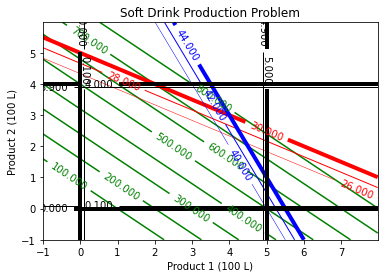

In [32]:
from gekko import GEKKO

m = GEKKO()

# variables
x1 = m.Var(value=0 , lb=0 , ub=5 , name='x1') # Product 1
x2 = m.Var(value=0 , lb=0 , ub=4 , name='x2') # Product 2
profit = m.Var(value=1 , name='profit')

# profit function
m.Obj(-profit)
m.Equation(profit==100*x1+125*x2)
m.Equation(3*x1+6*x2<=30)
m.Equation(8*x1+4*x2<=44)

m.solve()

print ('')
print ('--- Results of the Optimization Problem ---')
print ('Product 1 (x1): ' + str(x1[0]))
print ('Product 2 (x2): ' + str(x2[0]))
print ('Profit: ' + str(profit[0]))

## Generate a contour plot
# Import some other libraries that we'll need
# matplotlib and numpy packages must also be installed
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Design variables at mesh points
x = np.arange(-1.0, 8.0, 0.02)
y = np.arange(-1.0, 6.0, 0.02)
x1, x2 = np.meshgrid(x,y)

# Equations and Constraints
profit = 100.0 * x1 + 125.0 * x2
A_usage = 3.0 * x1 + 6.0 * x2
B_usage = 8.0 * x1 + 4.0 * x2

# Create a contour plot
plt.figure()
# Weight contours
lines = np.linspace(100.0,800.0,8)
CS = plt.contour(x1,x2,profit,lines,colors='g')
plt.clabel(CS, inline=1, fontsize=10)
# A usage < 30
CS = plt.contour(x1,x2,A_usage,[26.0, 28.0, 30.0],colors='r',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# B usage < 44
CS = plt.contour(x1, x2,B_usage,[40.0,42.0,44.0],colors='b',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Container for 0 <= Product 1 <= 500 L
CS = plt.contour(x1, x2,x1 ,[0.0, 0.1, 4.9, 5.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Container for 0 <= Product 2 <= 400 L
CS = plt.contour(x1, x2,x2 ,[0.0, 0.1, 3.9, 4.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# Add some labels
plt.title('Soft Drink Production Problem')
plt.xlabel('Product 1 (100 L)')
plt.ylabel('Product 2 (100 L)')
# Save the figure as a PNG
plt.savefig('contour.png')

# Show the plots
plt.show()

## Topic 2
### Transportation Problems
- NorthWest Corner Cell Method.
- Least Call Cell Method.
- Vogel’s Approximation Method (VAM).

Basic transportation problem structure

![title](T16.png)

1. NorthWest Corner Cell Method. 

In [44]:
import random

dem_sup_count = random.randint(5,10)

demand = []
supply = []
costs = []
nwc = []

for i in range(dem_sup_count):
    demand.append(random.randint(200,500))
    
supply = demand.copy()
supply.reverse()

for i in range(dem_sup_count):
    temp = []
    t = []
    for j in range(dem_sup_count):
        temp.append(random.randint(5,55))
        t.append(0)
    costs.append(temp)
    nwc.append(t)

i = 0 # tracking supply
j = 0 # tracking demand
while (i != dem_sup_count or j != dem_sup_count):
    x = 0
    if (supply[i] <  demand[j]):
        x = supply[i]
    else:
        x = demand[j]
    supply[i] -= x
    demand[j] -= x
    nwc[i][j] = x
    if (supply[i] ==  0 and i  < dem_sup_count):
        i += 1
    if (demand[j] == 0 and j < dem_sup_count):
        j += 1
        
total_cost = 0
for i in range(dem_sup_count):
        for j in range(dem_sup_count):
            total_cost += nwc[i][j] * costs[i][j]
        

print("Demand :" , demand)
print("---------------------")
print("Supply :" , supply)
print("---------------------")
print("nwc :" , nwc)
print("---------------------")
print("Costs :" , costs)
print("---------------------")
print("Total Cost =", total_cost)


Demand : [0, 0, 0, 0, 0, 0]
---------------------
Supply : [0, 0, 0, 0, 0, 0]
---------------------
nwc : [[374, 0, 0, 0, 0, 0], [16, 401, 0, 0, 0, 0], [0, 94, 106, 0, 0, 0], [0, 0, 128, 106, 0, 0], [0, 0, 0, 94, 401, 0], [0, 0, 0, 0, 16, 374]]
---------------------
Costs : [[49, 53, 16, 44, 44, 13], [34, 45, 38, 13, 22, 15], [41, 32, 17, 15, 34, 38], [31, 51, 33, 23, 54, 54], [15, 43, 50, 24, 5, 21], [38, 30, 22, 25, 24, 40]]
---------------------
Total Cost = 67992


2. Vogel’s Approximation Method (VAM).

In [26]:
from collections import defaultdict
 
costs  = {'W': {'A': 16, 'B': 16, 'C': 13, 'D': 22, 'E': 17},
          'X': {'A': 14, 'B': 14, 'C': 13, 'D': 19, 'E': 15},
          'Y': {'A': 19, 'B': 19, 'C': 20, 'D': 23, 'E': 50},
          'Z': {'A': 50, 'B': 12, 'C': 50, 'D': 15, 'E': 11}}
demand = {'A': 30, 'B': 20, 'C': 70, 'D': 30, 'E': 60}
cols = sorted(demand.keys())
supply = {'W': 50, 'X': 60, 'Y': 50, 'Z': 50}
res = dict((k, defaultdict(int)) for k in costs)
g = {}
for x in supply:
    g[x] = sorted(costs[x].keys(), key=lambda g: costs[x][g])
for x in demand:
    g[x] = sorted(costs.keys(), key=lambda g: costs[g][x])
 
while g:
    d = {}
    for x in demand:
        d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
    s = {}
    for x in supply:
        s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
    f = max(d, key=lambda n: d[n])
    t = max(s, key=lambda n: s[n])
    t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
    v = min(supply[f], demand[t])
    res[f][t] += v
    demand[t] -= v
    if demand[t] == 0:
        for k, n in supply.items():
            if n != 0:
                g[k].remove(t)
        del g[t]
        del demand[t]
    supply[f] -= v
    if supply[f] == 0:
        for k, n in demand.items():
            if n != 0:
                g[k].remove(f)
        del g[f]
        del supply[f]
 
for n in cols:
    print ("\t", n,end = "")
print()    
cost = 0
for g in sorted(costs):
    print (g, "\t", end = '')
    for n in cols:
        y = res[g][n]
        if y != 0:
            print (y,end = '')
        cost += y * costs[g][n]
        print ("\t",end = '')
    print()  
print ("\n\nTotal Cost = ", cost)

	 A	 B	 C	 D	 E
W 			50			
X 			20		40	
Y 	30	20				
Z 				30	20	


Total Cost =  3130


### Methods to Verify / Optimize a given BFS: 
- Stepping-Stone Method 



In [35]:
# STEPPING STONE ALGORITHUM FOR SOLVING THE TRANSHIPMENT PROBLEM
''' This program uses the stepping stone algorithum to solve
the transhipment problem. That is how to transport various quuantities
of material to various destinations minimising overall cost, given
the various costs of sending a unit from each source to each destination.
The sum of supply and demand must equal.'''

def PrintOut():
    GetDual()
    nCost = 0
    print()
    print ('    DEMAND' + ' ' * ( m * 10) + 'SUPPLY')
    for y in aDemand:    
        print ('%10i' % y,end = "")
    print()    
    for x in range( n):
        for y in range( m):
            nCost += aCost[ x][ y] * aRoute[ x][ y]
            if aRoute[ x][ y] == 0:
                print ('[<%2i>%4i]' %( aCost[ x][ y], aDual[ x][ y]),end = '')
            else:
                print ('[<%2i>(%2i)]' %( aCost[ x][ y], aRoute[ x][ y] + 0.5),end ='')
        print (' : %i' % aSupply[ x])
    print ('Cost: ', nCost)
    input('Press ENTER to continue')
        
def NorthWest():
    ''' The simplest method to get an initial solution.
    Not the most efficient'''
    global aRoute
    u  = 0
    v  = 0
    aS = [ 0] * m
    aD = [ 0] * n
    while u <= n - 1 and v <= m - 1:
        if aDemand[ v] - aS[ v] < aSupply[ u] - aD[ u]:
            z              = aDemand[ v] - aS[ v]
            aRoute[ u][ v] = z
            aS[ v]        += z
            aD[ u]        += z
            v             += 1
        else:
            z              = aSupply[ u] - aD[ u]
            aRoute[ u][ v] = z
            aS[ v]        += z
            aD[ u]        += z
            u             += 1

def NotOptimal():
    global PivotN
    global PivotM
    nMax = -nVeryLargeNumber
    GetDual()
    for u in range( 0, n):
        for v in range( 0, m):
            x = aDual[ u][ v]
            if x > nMax:
                nMax = x
                PivotN = u
                PivotM = v
    return ( nMax > 0)

def GetDual():
    global aDual
    for u in range( 0, n):
        for v in range( 0, m):
            aDual[ u][ v] = -0.5 # null value
            if aRoute[ u][ v] == 0:
                aPath = FindPath( u, v)
                z     = -1
                x     = 0
                for w in aPath:
                    x += z * aCost[ w[ 0]][ w[ 1]]
                    z *= -1
                aDual[ u][ v] = x
                
def FindPath( u, v):
    aPath = [[ u, v]]
    if not LookHorizontaly( aPath, u, v, u, v):
        print ('Path error, press key', u, v)
        raw_input()
    return aPath

def LookHorizontaly( aPath, u, v, u1, v1):
    for i in range( 0, m):
        if i != v and aRoute[ u][ i] != 0:
            if i == v1:
                aPath.append( [ u, i])
                return True # complete circuit
            if LookVerticaly( aPath, u, i, u1, v1):
                aPath.append( [ u, i])
                return True
    return False # not found

def LookVerticaly( aPath, u, v, u1, v1):
    for i in range( 0, n):
        if i != u and aRoute[ i][ v] != 0:
            if LookHorizontaly( aPath, i, v, u1, v1):
                aPath.append([ i, v])
                return True
    return False # not found

def BetterOptimal():
    global aRoute
    aPath = FindPath( PivotN, PivotM)
    nMin  = nVeryLargeNumber
    for w in range( 1, len( aPath), 2):
        t = aRoute[ aPath[ w][ 0]][ aPath[ w][ 1]]
        if t < nMin:
            nMin = t
    for w in range( 1 , len( aPath), 2):
        aRoute[ aPath[ w][ 0]][ aPath[ w][ 1]]         -= nMin
        aRoute[ aPath[ w - 1][ 0]][ aPath[ w - 1][ 1]] += nMin

# example 1
aCost = [[ 2, 1, 3, 3, 2, 5]
        ,[ 3, 2, 2, 4, 3, 4]
        ,[ 3, 5, 4, 2, 4, 1]
        ,[ 4, 2, 2, 1, 2, 2]]

aDemand = [ 30, 50, 20, 40, 30, 11]
aSupply = [ 50, 40, 60, 31]

''' example 2
aCost = [[ 1, 2, 1, 4, 5, 2]
        ,[ 3, 3, 2, 1, 4, 3]
        ,[ 4, 2, 5, 9, 6, 2]
        ,[ 3, 1, 7, 3, 4, 6]]
aDemand = [ 20, 40, 30, 10, 50, 25]
aSupply = [ 30, 50, 75, 20]
'''
''' example3
aCost = [[ 5, 3, 6, 2]
        ,[ 4, 7, 9, 1]
        ,[ 3, 4, 7, 5]]
aDemand = [ 16, 18, 30, 25]
aSupply = [ 19, 37, 34]         
'''         
n = len( aSupply)
m = len( aDemand)
nVeryLargeNumber = 99999999999
# add a small amount to prevent degeneracy
# degeneracy can occur when the sums of subsets of supply and demand equal
elipsis = 0.001
for k in aDemand:
    k += elipsis / len( aDemand)
aSupply[ 1] += elipsis
# initialisation
aRoute = []
for x in range( n):
    aRoute.append( [ 0] * m)
aDual  = []
for x in range( n):
    aDual.append( [ -1] * m)
NorthWest()
PivotN = -1
PivotM = -1
PrintOut()
# MAIN
while NotOptimal():
    print ('PIVOTING ON', PivotN, PivotM)
    BetterOptimal()
    PrintOut()
print ("FINISHED")


    DEMAND                                                            SUPPLY
        30        50        20        40        30        11
[< 2>(30)][< 1>(20)][< 3>  -2][< 3>  -4][< 2>  -1][< 5>  -4] : 50
[< 3>   0][< 2>(30)][< 2>(10)][< 4>  -4][< 3>  -1][< 4>  -2] : 40
[< 3>   2][< 5>  -1][< 4>(10)][< 2>(40)][< 4>(10)][< 1>   3] : 60
[< 4>  -1][< 2>   0][< 2>   0][< 1>  -1][< 2>(20)][< 2>(11)] : 31
Cost:  382.00000000000006
Press ENTER to continue
PIVOTING ON 2 5

    DEMAND                                                            SUPPLY
        30        50        20        40        30        11
[< 2>(30)][< 1>(20)][< 3>  -2][< 3>  -4][< 2>  -4][< 5>  -7] : 50
[< 3>   0][< 2>(30)][< 2>(10)][< 4>  -4][< 3>  -4][< 4>  -5] : 40
[< 3>   2][< 5>  -1][< 4>(10)][< 2>(40)][< 4>  -3][< 1>(10)] : 60
[< 4>   2][< 2>   3][< 2>   3][< 1>   2][< 2>(30)][< 2>( 1)] : 31
Cost:  351.997
Press ENTER to continue
PIVOTING ON 3 1

    DEMAND                                                            SU

## Topic 3 
### Assignment Problem

In the example there are five workers (numbered 0-4) and four tasks (numbered 0-3).The costs of assigning workers to tasks are shown in the following table.

![title](AC1.jpg)

The problem is to assign each worker to at most one task, with no two workers performing the same task, while minimizing the total cost. Since there are more workers than tasks, one worker will not be assigned a task.

In [38]:
# Import the libraries
from ortools.linear_solver import pywraplp

# Declare the MIP solver
# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('SCIP')


# Create the data
costs = [
    [90, 80, 75, 70],
    [35, 85, 55, 65],
    [125, 95, 90, 95],
    [45, 110, 95, 115],
    [50, 100, 90, 100],
]
num_workers = len(costs)
num_tasks = len(costs[0])


# Create the variables
# x[i, j] is an array of 0-1 variables, which will be 1
# if worker i is assigned to task j.
x = {}
for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.IntVar(0, 1, '')
        
        
# Create the constraints
# Each worker is assigned to at most 1 task.
for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

# Each task is assigned to exactly one worker.
for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)
    
    
# Create the objective function
objective_terms = []
for i in range(num_workers):
    for j in range(num_tasks):
        objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))


#Invoke the solver
status = solver.Solve()

#Print the solution
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print('Total cost = ', solver.Objective().Value(), '\n')
    for i in range(num_workers):
        for j in range(num_tasks):
            # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
            if x[i, j].solution_value() > 0.5:
                print('Worker %d assigned to task %d.  Cost = %d' %
                      (i, j, costs[i][j]))

Total cost =  265.0 

Worker 0 assigned to task 3.  Cost = 70
Worker 1 assigned to task 2.  Cost = 55
Worker 2 assigned to task 1.  Cost = 95
Worker 3 assigned to task 0.  Cost = 45


1. Hungarian Method

In [42]:
arr = [100, 130, 115, 55, 150, 75, 35, 110, 85, 50, 120, 120, 70, 150, 25, 90]
arr2 = []
numberOfRows = 4
numberOfColumns = 4
column = 0
for idx, val in enumerate(arr):
    row = len(arr2)/numberOfRows+1
    column = column + 1
    if column > numberOfColumns:
        column = 1
        
idx = {
        "row": row,
        "column": column,
        "index": idx,
        "original_value": val,
        "modified_value": val,
    }
arr2.append(idx)
    
    
for idx, val in enumerate(arr):
    row = len(arr2)/numberOfRows+1
    column = column + 1
    if column > numberOfColumns:
        column = 1
    idx = {
        "row": row,
        "column": column,
        "index": idx,
        "original_value": val,
        "modified_value": val,
    }
    arr2.append(idx)
    
newlist = sorted(arr2, key=lambda k: k['original_value'])

columnsTested = []
columnAndValue = []

for i in newlist:
    testObj = {
        "column": i['column'],
        "minVal": i['original_value']
    }
    
if i['column'] not in columnsTested:
        columnAndValue.append(testObj)
        columnsTested.append(i['column'])
        
columnsTested = []
columnAndValue = []
for i in newlist:
    testObj = {
        "column": i['column'],
        "minVal": i['original_value']
    }
    if i['column'] not in columnsTested:
        columnAndValue.append(testObj)
        columnsTested.append(i['column'])


for i in newlist:
    for j in columnAndValue:
        if i['column'] == j['column']:
            i['modified_value'] = i['modified_value'] - j['minVal']
            
rowsTested = []
rowAndValue = []
for i in newlist:
    testObj = {
        "row": i["row"],
        "minVal": i["modified_value"],
        "modified": i["modified_value"]
    }
    if i['row'] not in rowsTested:
        rowAndValue.append(testObj)
        rowsTested.append(i['row'])

for i in newlist:
    for j in rowAndValue:
        if i['row'] == j['row'] and j['modified'] > 0:
            i['modified_value'] = i['modified_value'] - j['minVal']
            
newlist


[{'row': 4.75,
  'column': 3,
  'index': 14,
  'original_value': 25,
  'modified_value': 0},
 {'row': 2.75,
  'column': 3,
  'index': 6,
  'original_value': 35,
  'modified_value': 0},
 {'row': 3.5,
  'column': 2,
  'index': 9,
  'original_value': 50,
  'modified_value': 0},
 {'row': 2.0,
  'column': 4,
  'index': 3,
  'original_value': 55,
  'modified_value': 0},
 {'row': 4.25,
  'column': 1,
  'index': 12,
  'original_value': 70,
  'modified_value': 0},
 {'row': 2.5,
  'column': 2,
  'index': 5,
  'original_value': 75,
  'modified_value': 0},
 {'row': 3.25,
  'column': 1,
  'index': 8,
  'original_value': 85,
  'modified_value': 0},
 {'row': 1.0,
  'column': 4,
  'index': 15,
  'original_value': 90,
  'modified_value': 0},
 {'row': 5.0,
  'column': 4,
  'index': 15,
  'original_value': 90,
  'modified_value': 0},
 {'row': 1.25,
  'column': 1,
  'index': 0,
  'original_value': 100,
  'modified_value': 0},
 {'row': 3.0,
  'column': 4,
  'index': 7,
  'original_value': 110,
  'modified_

we can see that the four values with 0’s are at the top of our list, and we can easily select the ones that don’t occur in duplicate rows or columns.

### Question:

A car company produces 2 models, model A and model B. Long-term projections indicate an expected demand of at least 100 model A cars and 80 model B cars each day. Because of limitations on production capacity, no more than 200 model A cars and 170 model B cars can be made daily. To satisfy a shipping contract, a total of at least 200 cars much be shipped each day. If each model A car sold results in a $2000 loss, but each model B car produces a $5000 profit, how many of each type should be made daily to maximize net profits?
car models - A & B

demand: A >= 100 ; B >= 80

produce: A <= 200 ; B <= 170

So, we can conclude that: 200 >= A >= 100 and 170 >= B >= 80

Shipping: A + B >= 200

objective function: ( z = 5000B - 2000A )

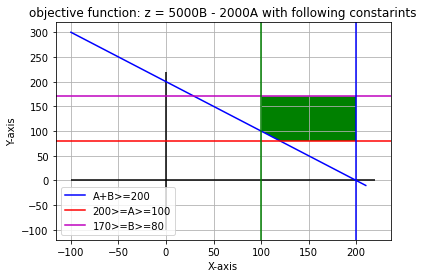


 calculating for point: A = 200.000000 and B = 170.000000
solution for z =  450000.0

 calculating for point: A = 100.000000 and B = 170.000000
solution for z =  650000.0

 calculating for point: A = 100.000000 and B = 100.000000
solution for z =  300000.0

 calculating for point: A = 120.000000 and B = 80.000000
solution for z =  160000.0

 calculating for point: A = 200.000000 and B = 80.000000
solution for z =  0.0

 the maximum profit z = $0.000000 @ A = 200.000000 and B = 80.000000


In [46]:
import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy
from numpy import arange
figure()
A = arange(-100, 220, 10)
B = arange(-100, 220, 10)


# constraint equation


B1 = 200.0 - A


xlim = (-100, 220)
ylim= (-100, 220)
hlines(0, -100, 220, color = 'k')
vlines(0, -100, 220, color = 'k')
grid(True)


xlabel('X-axis')
ylabel('Y-axis')


#Plotting graph


plot(A, B1, color = 'b')
axhline(y = 80, color = 'r')
axhline(y = 170, color = 'm')
axvline(x = 200, color = 'b')
axvline(x = 100, color = 'g')


title('objective function: z = 5000B - 2000A with following constarints')
legend(['A+B>=200','200>=A>=100','170>=B>=80'])


# get the co-ordinates of intersection points by mere visualisation
A = [200.0,100.0, 100.0, 120.0,200.0]
B = [170.0, 170.0, 100.0, 80.0, 80.0]
fill(A,B,'g+')


show()


#Getting Solution
checker = 0
for i,j in zip(A,B):
    print('\n calculating for point: A = {0:f} and B = {1:f}' .format(i,j))
    print('solution for z = ', 5000*j-2000*i)
if(checker <= (5000*j-2000*i)):
    checker = (5000*j-2000*i)
    X,Y = i,j


print('\n the maximum profit z = ${0:f} @ A = {1:f} and B = {2:f}' .format(checker,X,Y))


# Topic 4 
### PERT & CPM

![title](pert.png)

In [49]:
import math
import logging

logging.basicConfig(filename='logger.log', level=logging.INFO, format='%(name)s - %(levelname)s - %(message)s')

class Activity:
    def __init__(self, name, duration):
        logging.info("new activity has been created, name: " + name + ", duration: " + str(duration))
        self.name = str(name).lower()
        self.duration = duration

    # str method for activity
    def __str__(self):
        logging.info("str method called for '" + self.name + "' activity")
        return "Activity Name: " + self.name + ", Duration: " + str(self.duration)


    def __repr__(self):
        logging.info("repr method called for '" + self.name + "' activity")
        return self.name

class Pert:
    # a graph is a map with activities as keys and list of outgoing activities as value for every key
    # the graph starts with a 'start' node and ends with a 'end' node
    # see example below
    def __init__(self, graph={}):
        logging.info("new pert: '" + repr(self) + "' has been created, graph: " + str(graph))
        self.forward_dict = graph   # list of out going nodes for every activity
        self.backward_dict = {}     # list of in going nodes for every activity
        self.info_dict = {}         # map of details for every activity
        self.start_activity = Activity
        self.end_activity = Activity
        self.reset_initial_graph()  # first reset of the graph
        self.generate_info()        # enetering values into 'info_dict'

    # str method for pert
    def __str__(self):
        logging.info("str method called for '" + repr(self) + "' pert")
        iterator = iter(self)
        graph_str = 'Activities:\n'
        for activity in iterator:
            graph_str += str(activity) + '\n'
        return (graph_str + 'Connections:\n' 
            + str(self.forward_dict)
            + '\nProject Duration:\n' 
            + str(self.info_dict[self.end_activity]['ef']))

    # iterator for the pert class
    def __iter__(self):
        logging.info("new iterator for '" + repr(self) + "' pert")
        return iter(self.forward_dict)

    # reseting 'backward_dict' for every activity
    # setting 'start_activity' and 'end_activity'
    def reset_initial_graph(self):
        logging.info("'reset_initial_graph' method has been called for '" + repr(self) + "' pert")
        for activity in self.forward_dict:
            self.backward_dict[activity] = []
        for activity in self.forward_dict:
            if activity.name == "start":
                self.start_activity = activity
            if activity.name == "end":
                self.end_activity = activity
            for node in self.forward_dict[activity]:
                self.backward_dict[node].append(activity)
        self.reset_info()

    # duration: the duration of the activity
    # es: early start
    # ef: early finish
    # ls: late start
    # lf: late finish
    # slack: lf - ef or ls - es
    def reset_info(self):
        logging.info("'reset_info' method has been called for '" + repr(self) + "' pert")
        for activity in self.forward_dict:
            self.info_dict[activity] = {
                "duration": activity.duration, 
                "es": 0, "ef": 0, "ls": 0, "lf": math.inf, 
                "slack": 0}

    # run from start to end and put all 'es' 'ef' details in place
    # run from end to start and put all 'ls' 'lf' details in place
    # calculate slack for all activities (except isolated)
    # caclculate details for isolated activities
    def generate_info(self):
        logging.info("'generate_info' method has been called for '" + repr(self) + "' pert")
        if self.forward_dict == {}:
            return
        self.info_dict[self.start_activity]["ef"] = self.info_dict[self.start_activity]["duration"]
        self.start_to_end_scan(self.start_activity)
        self.info_dict[self.end_activity]["lf"] = self.info_dict[self.end_activity]["ef"]
        self.info_dict[self.end_activity]["ls"] = self.info_dict[self.end_activity]["lf"] - self.info_dict[self.end_activity]["duration"]
        self.end_to_start_scan(self.end_activity)
        self.clatulate_slack()
        self.generate_info_for_isolated()

    # run from start to end and put all 'es' 'ef' details in place
    def start_to_end_scan(self, activity):
        logging.info("'start_to_end_scan' method has been called for '" + repr(self) + "' pert")
        for node in self.forward_dict[activity]:
            if self.info_dict[activity]["ef"] > self.info_dict[node]["es"]:
                self.info_dict[node]["es"] = self.info_dict[activity]["ef"]
                self.info_dict[node]["ef"] = self.info_dict[node]["es"] + self.info_dict[node]["duration"]
            self.start_to_end_scan(node)

    # run from end to start and put all 'ls' 'lf' details in place
    def end_to_start_scan(self, activity):
        logging.info("'end_to_start_scan' method has been called for '" + repr(self) + "' pert")
        for node in self.backward_dict[activity]:
            if (self.info_dict[node]["lf"] > self.info_dict[activity]["ls"]):
                self.info_dict[node]["lf"] = self.info_dict[activity]["ls"]
                self.info_dict[node]["ls"] = (self.info_dict[node]["lf"] - self.info_dict[node]["duration"])
            self.end_to_start_scan(node)

    # calculate slack for all activities (except isolated)
    def clatulate_slack(self):
        logging.info("'clatulate_slack' method has been called for '" + repr(self) + "' pert")
        for activity in self.forward_dict:
            self.info_dict[activity]["slack"] = self.info_dict[activity]["lf"] - self.info_dict[activity]["ef"]

    # caclculate details for isolated activities
    # assumption: activity duration shorter than project duration
    def generate_info_for_isolated(self):
        logging.info("'generate_info_for_isolated' method has been called for '" + repr(self) + "' pert")
        isolated = self.find_isolated()
        for activity in isolated:
            self.info_dict[activity]["ef"] = self.info_dict[activity]["es"] + self.info_dict[activity]["duration"]
            self.info_dict[activity]["lf"] = self.info_dict[self.end_activity]["lf"]
            self.info_dict[activity]["ls"] = self.info_dict[activity]["lf"] - self.info_dict[activity]["duration"]
            self.info_dict[activity]["slack"] = self.info_dict[activity]["lf"] - self.info_dict[activity]["ef"]

    # add activity to the pert
    def add_activity(self, activity, in_connections=[], out_connections=[]):
        logging.info("'add_activity' method has been called for '" + repr(self) + "' pert")
        if activity in self.forward_dict:
            return
        self.forward_dict[activity] = out_connections
        self.backward_dict[activity] = in_connections
        if in_connections != []:
            for node in in_connections:
                if self.forward_dict[node] is None:
                    self.forward_dict[node] = []
                self.forward_dict[node] += [activity]
        if out_connections != []:
            for node in out_connections:
                if self.backward_dict[node] is None:
                    self.backward_dict[node] = []
                self.backward_dict[node] += [activity]
        self.info_dict[activity] = {
            "duration": activity.duration, 
            "es": 0, "ef": 0, "ls": 0, "lf": math.inf, 
            "slack": 0}
        self.reset_info()
        self.generate_info()

    # find isolated activities
    def find_isolated(self):
        logging.info("'find_isolated' method has been called for '" + repr(self) + "' pert")
        isolated = list(self.info_dict)
        for activity in self.forward_dict:
            if self.forward_dict[activity] != [] and activity in isolated:
                isolated.remove(activity)
        for activity in self.backward_dict:
            if self.backward_dict[activity] != [] and activity in isolated:
                isolated.remove(activity)
        return isolated
    
    # get slack time for each activity in descending order without critical activities
    def get_slack_for_each_activity(self):
        logging.info("'get_slack_for_each_activity' method has been called for '" + repr(self) + "' pert")
        slacks = {activity: self.info_dict[activity]["slack"] for activity in self.info_dict if self.info_dict[activity]["slack"] != 0}
        return sorted(slacks.items(), key=lambda kv: kv[1], reverse=True)
    
    # get the sum of all the slacks in the project
    def get_sum_of_slacks(self):
        logging.info("'get_sum_of_slacks' method has been called for '" + repr(self) + "' pert")
        slacks = [kv[1] for kv in self.get_slack_for_each_activity()]
        return sum(slacks)

    # get the critical path as list
    def get_critical_path(self):
        logging.info("'get_critical_path' method has been called for '" + repr(self) + "' pert")
        activity = self.start_activity
        path = [activity]
        while activity != self.end_activity :
            for node in self.forward_dict[activity]:
                if self.info_dict[node]["slack"] == 0:
                    activity = node
            path += [activity]
        return path

    # get the critical path with length as map
    def get_critical_path_with_length(self):
        logging.info("'get_critical_path_with_length' method has been called for '" + repr(self) + "' pert")
        return {activity: activity.duration for activity in self.get_critical_path()}
    
    # get a map of the activities with the maximum amount of time to reduce from it's duration without taking it our of the critical path
    # we are getting all alternative paths between 2 nodes (activities) in the critical path (only nodes that have at least one node between them)
    # we are taking the minimum slack and putting it as the value for maximum reduction
    # the minimum duration for every task is 1
    def shorten_critical_path(self):
        logging.info("'shorten_critical_path' method has been called for '" + repr(self) + "' pert")
        critical_path = self.get_critical_path()
        max_decrease_to_activities = {activity: activity.duration - 1 for activity in critical_path}
        for i in range(0,  len(critical_path), 1):
            for j in range(2, len(critical_path) - i, 1):
                for path in self.get_all_alternative_paths(critical_path[i], critical_path[i + j]):
                    for activity in critical_path[i + 1 : i + j : 1]:
                        if path[1] not in critical_path and max_decrease_to_activities[activity] >= self.info_dict[path[1]]["slack"]:
                            max_decrease_to_activities[activity] = self.info_dict[path[1]]["slack"] - 1
        return max_decrease_to_activities

    # get all the paths between 2 nodes (activities) in the graph (pert)
    def get_all_alternative_paths(self, start_activity, end_activity, path=[]):
        logging.info("'get_all_alternative_paths' method has been called for '" + repr(self) + "' pert")
        one_path = path + [start_activity]
        if start_activity == end_activity:
            return [one_path]
        if start_activity not in self.info_dict:
            return []
        paths = []
        for activity in self.forward_dict[start_activity]:
            paths += self.get_all_alternative_paths(activity, end_activity, one_path)
        return paths

if __name__ == "__main__":
    start = Activity("start", 5)
    a = Activity("a", 2)
    b = Activity("b", 3)
    c = Activity("c", 3)
    d = Activity("d", 4)
    e = Activity("e", 3)
    f = Activity("f", 6)
    end = Activity("end", 2)
    graph = {start: [a, d, f], a: [b], b: [c], c: [end], d: [e], e: [end], f:[end], end:[]}
    
    print("initialize a graph:")
    pert = Pert(graph)
    
    # add activity
    j = Activity("j", 16)
    print("add activity to project:")
    pert.add_activity(j, [start], [end])
    
    # print activity with str
    print("print activity:")
    print(j)
    print("critical path:")
    print(pert.get_critical_path())
    
    # maximum shorting times
    print("maximum shorting times:")
    print(pert.shorten_critical_path())
    
    # slack time for each activity
    print("slack time in descending order:")
    print(pert.get_slack_for_each_activity())
    
    # sum of slack times
    print("sum of slack times:")
    print(pert.get_sum_of_slacks())
    
    # iterate on the nodes with iterator
    print("iterate over all the activities with iterator:")
    for activity in iter(pert):
        print(activity)
        
    # isolated activities
    print("isolated activities:")
    print(pert.find_isolated())
    # print pert
    print("print pert:")
    print(pert)

initialize a graph:
add activity to project:
print activity:
Activity Name: j, Duration: 16
critical path:
[start, j, end]
maximum shorting times:
{start: 4, j: 7, end: 1}
slack time in descending order:
[(f, 10), (d, 9), (e, 9), (a, 8), (b, 8), (c, 8)]
sum of slack times:
52
iterate over all the activities with iterator:
Activity Name: start, Duration: 5
Activity Name: a, Duration: 2
Activity Name: b, Duration: 3
Activity Name: c, Duration: 3
Activity Name: d, Duration: 4
Activity Name: e, Duration: 3
Activity Name: f, Duration: 6
Activity Name: end, Duration: 2
Activity Name: j, Duration: 16
isolated activities:
[]
print pert:
Activities:
Activity Name: start, Duration: 5
Activity Name: a, Duration: 2
Activity Name: b, Duration: 3
Activity Name: c, Duration: 3
Activity Name: d, Duration: 4
Activity Name: e, Duration: 3
Activity Name: f, Duration: 6
Activity Name: end, Duration: 2
Activity Name: j, Duration: 16
Connections:
{start: [a, d, f, j], a: [b], b: [c], c: [end], d: [e], e: [e

In [50]:
import logging
import unittest
import itertools

def log_with_msg(msg):
    def log(func):
        def wrapper(self, *args, **kwargs):
            logging.getLogger(__name__ + ": ").info(msg)
            return func(self, *args, **kwargs)
        return wrapper
    return log

class Activity:
    """
        The Activity class
        -------------------
        represents the edges between each node
        Each activity has a unique name and its duration in the project
        Activities will be equal if their name and their duration is the same
    """

    @log_with_msg("Initializing Activity")
    def __init__(self, name, duration):
        self._name = name
        self._duration = duration

    @log_with_msg("Returning Activity repr")
    def __repr__(self) -> str:
        return f"<{self.name}, {self.duration} weeks>"

    @log_with_msg("Returning Activity str")
    def __str__(self) -> str:
        return f"<{self.name}, {self.duration} weeks>"

    @property
    def name(self) -> str:
        return self._name

    @name.setter
    def name(self, name):
        self._name = name

    @property
    def duration(self) -> float:
        return self._duration

    @duration.setter
    def duration(self, duration):
        self._duration = duration

    @log_with_msg("Comparing Activities")
    def __eq__(self, other) -> bool:
        return self.name == other.name and self.duration == other.duration

    def __ne__(self, other) -> bool:
        return not self == other


class Node:
    """
        The Node class
        --------------
        represents the actual node in the graph.
        knows the early and late finish times and also knows the slack time
        Each node is unique and is recognized by its number.
        A node is equal to another node if their number is equal (regardless of the other properties)
        It is set that way to keep the nodes unique
        Each node has an optional parallel node. If a node has a parallel node,
        both activities leading to those nodes must be completed together
    """

    @log_with_msg("Initializing Node")
    def __init__(self, number: int, *parallel_nodes: "List of Nodes"):
        self._number = number
        self._early_finish = 0
        self._late_finish = 0
        self._slack = 0
        self._parallel_nodes = parallel_nodes

    @log_with_msg("Returning Node repr")
    def __repr__(self) -> repr:
        return f"(Node {self.number})"

    @log_with_msg("Returning Node str")
    def __str__(self) -> str:
        string = f"(Node {self.number})"
        if not (self.late_finish == self.early_finish == 0):
            string += f"{[self.early_finish,self.late_finish]}"
        if self.has_parallel_nodes():
            string += " <---> {"
            for node in list(self.parallel_nodes)[:-1]:
                string += f"{node}, "
            string += f"{self.parallel_nodes[-1]}" + "}"
        return string

    @property
    def early_finish(self) -> float:
        return self._early_finish

    @early_finish.setter
    def early_finish(self, early_finish):
        self._early_finish = early_finish

    @property
    def late_finish(self) -> float:
        return self._late_finish

    @late_finish.setter
    def late_finish(self, late_finish):
        self._late_finish = late_finish

    @property
    def slack(self) -> float:
        return self._slack

    @slack.setter
    def slack(self, slack: float):
        self._slack = slack

    @property
    def number(self) -> int:
        return self._number

    @number.setter
    def number(self, number: int):
        self._number = number

    @property
    def parallel_nodes(self) -> tuple:
        return self._parallel_nodes

    @parallel_nodes.setter
    def parallel_nodes(self, *parallel_nodes: tuple):
        self._parallel_nodes = parallel_nodes

    @log_with_msg("Checking if Node has parallel nodes")
    def has_parallel_nodes(self) -> bool:
        return list(self.parallel_nodes) != []

    @log_with_msg("Comparing Nodes")
    def __eq__(self, other) -> bool:
        return self.number == other.number

    def __ne__(self, other) -> bool:
        return not self == other

    @log_with_msg("Hashing Node")
    def __hash__(self) -> float:
        return hash(self.number)

    # For sorting purposes
    @log_with_msg("Checking what node is bigger")
    def __lt__(self, other) -> bool:
        return self.number < other.number

class Transition:
    """
        Transition class
        ----------------
        represents the transitions from one node to another.
        keeps track of the activity, the start node and the target node
    """

    @log_with_msg("Initializing Transition")
    def __init__(self, from_node: Node, activity: Activity, to_node: Node):
        self._from_node = from_node
        self._activity = activity
        self._to_node = to_node

    @log_with_msg("Returning Transition repr")
    def __repr__(self) -> repr:
        return f"({repr(self._from_node)}, {self._activity}, {repr(self._to_node)})"

    @log_with_msg("Returning Transition str")
    def __str__(self) -> str:
        return f" {self.from_node} -> {self._activity} -> {self._to_node}"

    @property
    def from_node(self) -> Node:
        return self._from_node

    @from_node.setter
    def from_node(self, from_node: Node):
        self._from_node = from_node

    @property
    def to_node(self) -> Node:
        return self._to_node

    @to_node.setter
    def to_node(self, to_node: Node):
        self._to_node = to_node

    @property
    def activity(self) -> Activity:
        return self._activity

    @activity.setter
    def activity(self, activity: Activity):
        self._activity = activity

    @log_with_msg("Comparing Transitions")
    def __eq__(self, other) -> bool:
        return self.activity == other.activity

    def __ne__(self, other) -> bool:
        return not self == other


class Project:
    """
    The Pert class
    --------------
    The class which represents the pert, using a graph.
    The graph is a dictionary of {Node : list(Transition)} - each node with the corresponding transitions from it.
    If no graph was passed to the constructor, an empty graph is initialized
    """

    @log_with_msg("Initializing new PERT")
    def __init__(self, graph: dict = None):
        self._graph = graph if graph is not None else {}
        self._all_nodes = []
        self._all_paths = []
        self._all_transition = []
        self._all_activities = []
        self._slack_list = []
        self._isolated_list = []
        self._critical_paths = []
        self._start = None
        self._end = None
        self.update()

    @log_with_msg("Printing PERT")
    def __str__(self) -> str:
        string = '!!WARNING: Invalid Graph!!' if not self.is_valid() else ''
        for path in self.all_paths:
            string += f"\nCRITICAL PATH: " if path in self.critical_paths else f"\n" + "\t" * 3 + " " * 3
            for count, n in enumerate(path[:-1]):
                if n == self.start:
                    string += f"{([trans for trans in self.graph[path[count]] if trans.to_node == path[count + 1]])[0]}"
                elif self.end is not None and n == self.end:
                    string += f" -> {self.graph[path[count-1]][0].activity} -> {n}"
                else:
                    for trans in self.graph[n]:
                        if trans.to_node == path[count + 1]:
                            string += f"-> {trans.activity} -> {trans.to_node}"
                            break
            string += '\n'
        return string

    @property
    def graph(self) -> dict:
        return self._graph

    @graph.setter
    def graph(self, graph: dict):
        self._graph = graph
        self.update() if graph else self.__nullify_graph__()

    @property
    def all_nodes(self) -> list:
        return self._all_nodes

    @all_nodes.setter
    def all_nodes(self, all_nodes: list):
        self._all_nodes = all_nodes

    @property
    def all_paths(self) -> list:
        return self._all_paths

    @all_paths.setter
    def all_paths(self, all_paths: list):
        self._all_paths = all_paths

    @property
    def all_transition(self) -> list:
        return self._all_transition

    @all_transition.setter
    def all_transition(self, all_transition: list):
        self._all_transition = all_transition

    @property
    def all_activities(self) -> list:
        return self._all_activities

    @all_activities.setter
    def all_activities(self, all_activities: list):
        self._all_activities = all_activities

    @property
    def slack_list(self) -> list:
        return self._slack_list

    @slack_list.setter
    def slack_list(self, slack_list: list):
        self._slack_list = slack_list

    @property
    def isolated_list(self) -> list:
        return self._isolated_list

    @isolated_list.setter
    def isolated_list(self, isolated_list: list):
        self._isolated_list = isolated_list

    @property
    def critical_paths(self) -> list:
        return self._critical_paths

    @critical_paths.setter
    def critical_paths(self, critical_paths: list):
        self._critical_paths = critical_paths

    @property
    def start(self) -> Node:
        return self._start

    @start.setter
    def start(self, start: Node):
        self._start = start

    @property
    def end(self) -> Node:
        return self._end

    @end.setter
    def end(self, end: Node):
        self._end = end

    # nullifies the graph's properties
    @log_with_msg("Nullifying PERT")
    def __nullify_graph__(self):
        self.all_nodes = []
        self.all_transition = []
        self.isolated_list = []
        self.all_paths = []
        self.all_activities = []
        self.slack_list = []
        self.critical_paths = []
        self.start = None
        self.end = None

    # calculates the early finished, the late finishes, the slack times and the duration of the project
    @log_with_msg("Updating PERT")
    def update(self):
        if self.graph is not None:
            self.all_nodes = self.__get_all_nodes__()
            self.all_transition = self.__get_transition_list__()
            self.isolated_list = self.__get_isolated_nodes__()
            self.start = self.__get_start_node__()
            self.end = self.__get_end_node__()
            self.all_paths = self.__find_all_paths__(self.start)
            self.all_activities = self.__get_activities_list__()
            self.__calc_early_finishes__()
            self.__calc_late_finishes__()
            self.__calc_slack_times__()
            self.critical_paths = self.__get_critical_paths__()
            self.slack_list = self.__get_all_slacks__()

    # Return the length of the project
    @log_with_msg("Returning length of PERT")
    def __len__(self) -> float:
        return self.end.late_finish if self.graph is not None else 0

    # Returns a node from the graph which his number is node_number
    # @:param node_number - the number of the node which we want to retrieve
    @log_with_msg("Retrieving Node")
    def get_node_number(self, node_number: int) -> list or None:
        for node in self.all_nodes:
            if node.number == node_number:
                return node
        return None

    #  Adds a new activity to the project.
    #  @:param
    #  from_node - the node number from which the activity is going
    #  activity - the activity itself
    #  to_node - the node number to which the activity is going
    @log_with_msg("Adding Activity")
    def add_activity(self, from_node: int, activity: Activity, to_node: int):
        f_node = self.get_node_number(from_node)
        t_node = self.get_node_number(to_node)
        transition = Transition(f_node if f_node else Node(from_node), activity, t_node if t_node else Node(to_node))
        if transition not in self._all_transition:
            self.graph[transition.from_node] = self.graph[transition.from_node] + [
                transition] if transition.from_node in self.all_nodes else [transition]
            if transition.to_node not in self.all_nodes:
                self.graph[transition.to_node] = []
            self.update()

    # adds an arbitrary amount of transitions to the graph
    # @:param *args - list of transitions to be added to the graph
    def add_activities(self, *args: "List of Transitions"):
        for transition in args:
            self.add_activity(transition.from_node.number, transition.activity, transition.to_node.number)

    # Removes a transition from the graph which his activity is the argument passed, thus removing the activity too
    # @:param activity - the activity whom transition is deleted
    @log_with_msg("Deleting Activity")
    def del_activity(self, activity: Activity):
        for transitions in self.graph.values():
            for transition in transitions:
                if activity == transition.activity:
                    transitions.remove(transition)
        self.update()

    # Returns an activity list
    @log_with_msg("Getting Activity list")
    def __get_activities_list__(self) -> list:
        return [transition.activity for transition in self.all_transition]

    # Return a list of all nodes, including isolated nodes
    @log_with_msg("Getting all nodes")
    def __get_all_nodes__(self) -> list:
        return list(self.graph.keys()) if self.graph is not None else []

    # Returns the transition list
    @log_with_msg("Getting Transition list")
    def __get_transition_list__(self) -> list:
        return list(itertools.chain(*self.graph.values())) if self.graph is not None else []

    # Returns a list of isolated nodes =
    # nodes which none of the activities are going to, and none of the activities are going from
    @log_with_msg("Getting isolated nodes")
    def __get_isolated_nodes__(self) -> list:
        return [node for node in self.all_nodes if
                not self.graph[node] and node not in [tr.to_node for tr in self.all_transition]]

    # Returns the critical paths in the project
    # By definition - a critical path is a path which every node in it has 0 slack time
    @log_with_msg("Getting critical paths")
    def __get_critical_paths__(self) -> list:
        return [path for path in self.all_paths if not [node.slack for node in path if node.slack is not 0]]

    # Returns true if and only if this graph is valid, aka - has no cycles in it
    # NOTE : a cyclic path in the graph is for example :
    #       Node1->Node2->Node3->Node4->Node2
    @log_with_msg("Checking if valid")
    def is_valid(self) -> bool:
        return True not in [len(set(path)) < len(path) for path in self.all_paths]

    # Returns a sorted list of slack
    @log_with_msg("Getting all slack times")
    def __get_all_slacks__(self) -> list:
        return sorted([node.slack for node in self.all_nodes if node.slack is not 0], reverse=True)

    # Returns the starting node, not including isolated nodes
    @log_with_msg("Getting start nodes")
    def __get_start_node__(self) -> Node:
        for node in self.all_nodes:
            if node not in [tr.to_node for tr in self.all_transition] and node not in self.isolated_list:
                return node

    # Returns the ending node, not including isolated nodes
    # NOTICE: if the graph is cyclic, there might not be an end node, in this case, the returned value will be None
    @log_with_msg("Getting end node")
    def __get_end_node__(self) -> Node or None:
        for node in self.all_nodes:
            if not self.graph[node] and not node.has_parallel_nodes() and node not in self.isolated_list:
                return node
        return None

    # Calculates the early finishes possible
    @log_with_msg("Calculating early finishes")
    def __calc_early_finishes__(self):
        for node in list(itertools.chain(*self.all_paths)):
            for transition in self._graph[node]:
                transition.to_node.early_finish = transition.activity.duration + transition.from_node.early_finish \
                    if transition.to_node.early_finish is 0 else max(transition.to_node.early_finish,
                                                                     transition.from_node.early_finish +
                                                                     transition.activity.duration)
                for par_node in transition.to_node.parallel_nodes:
                    self.get_node_number(par_node.number).early_finish = max(transition.to_node.early_finish,
                                                                             par_node.early_finish)

    # Calculates the latest finishes possible
    @log_with_msg("Calculating late finishes")
    def __calc_late_finishes__(self):
        if self.end is not None:
            self.end.late_finish = self.end.early_finish
        for node in reversed(list(itertools.chain(*self.all_paths))):
            for transition in reversed(self.graph[node]):
                if transition.to_node.has_parallel_nodes():
                    late = min(
                        [self.get_node_number(par.number).late_finish for par in transition.to_node.parallel_nodes])
                    # if we haven't calculated late finish yet or if the late is smaller than the current late finish
                    if transition.to_node.late_finish is 0 or transition.to_node.late_finish > late:
                        transition.to_node.late_finish = late

                # if to_node.late_finish still 0, we can't compute its from_node.late_finish yet...
                if transition.to_node.late_finish is not 0:
                    transition.from_node.late_finish = transition.to_node.late_finish - transition.activity.duration \
                        if transition.from_node.late_finish is 0 and transition.from_node != self.start \
                        else min(transition.from_node.late_finish,
                                 transition.to_node.late_finish - transition.activity.duration)

    # Calculates the slack times for each node
    @log_with_msg("Calculating slack times")
    def __calc_slack_times__(self):
        for node in self.all_nodes:
            node.slack = node.late_finish - node.early_finish

    # Finds all the paths in this project
    # The search will not include paths with isolated nodes.
    @log_with_msg("Finding all paths")
    def __find_all_paths__(self, start_node: Node, path: list = None) -> list:
        graph = self.graph
        path = path if path is not None else []
        if start_node in path or not graph[start_node]:
            return [path + [start_node]]
        path = path + [start_node]
        if start_node not in graph:
            return []
        paths = []
        for transition in graph[start_node]:
            paths += [path for path in self.__find_all_paths__(transition.to_node, path)]
        return paths

    # Implementation of the contains method.
    # Returns true if and only if the item is in this graph
    # An item can be of class Node, Activity or Transition
    @log_with_msg("Checking if item is in PERT")
    def __contains__(self, item) -> bool:
        if not (isinstance(item, Node) or isinstance(item, Activity) or isinstance(item, Transition)):
            raise PermissionError("this item doesnt belong to the pert!")
        return self.get_node_number(item.number) is not None if isinstance(item, Node) else \
            item in self.all_activities if isinstance(item, Activity) else item in self.all_transition


"""
    Test Classes - for your convenience
"""


class TestPert(unittest.TestCase):
    node_list = [Node(-1)] + [Node(i) for i in range(1, 12)]
    transition_list = [
        Transition(node_list[1], Activity('Formalize specs', 6), node_list[2]),
        Transition(node_list[2], Activity('Design system', 4), node_list[3]),
        Transition(node_list[2], Activity('Certification Requirements', 3), node_list[4]),
        Transition(node_list[2], Activity('Design Software', 6), node_list[6]),
        Transition(node_list[3], Activity('Prototype System', 2), node_list[5]),
        Transition(node_list[4], Activity('Certification Documentation', 4), node_list[9]),
        Transition(node_list[9], Activity('Certification Application', 1), node_list[10]),
        Transition(node_list[10], Activity('Complete Certification', 4), node_list[11]),
        Transition(node_list[6], Activity('Code Software', 4), node_list[8]),
        Transition(node_list[8], Activity('Complete Software', 1), node_list[11]),
        Transition(node_list[5], Activity('Test System', 3), node_list[6]),
        Transition(node_list[6], Activity('Release System', 2), node_list[7]),
        Transition(node_list[7], Activity('Manufacture System', 4), node_list[11]),
    ]

    @staticmethod
    def create_new_graph():
        graph = {}
        for transition in TestPert.transition_list:
            if transition.from_node in graph.keys():
                graph[transition.from_node].append(transition)
            else:
                graph[transition.from_node] = [transition]
        graph[TestPert.node_list[11]] = []
        return graph

    def setUp(self):
        self.pert = Project(TestPert.create_new_graph())

    def tearDown(self):
        self.pert = None

    # Tests for first graph
    def test_starts(self):
        self.assertEqual([(node.early_finish, node.late_finish) for node in sorted(self.pert.all_nodes)],
                         [(0, 0), (6, 6), (10, 10), (9, 12), (12, 12),
                          (15, 15), (17, 17), (19, 20), (13, 16), (14, 17),
                          (21, 21)])

    def test_project_duration(self):
        self.assertEqual(21, len(self.pert))

    def test_isolated_activities(self):
        self.pert.graph[Node(14)] = []
        self.pert.update()
        self.assertEqual([node.number for node in self.pert.isolated_list], [14])

    def test_add_activity(self):
        self.pert.add_activity(11, Activity("Test Activity", 2), 12)
        self.assertEqual(12, self.pert.__get_end_node__().number)
        self.assertEqual(len(self.pert), 23)

    def test_del_activity(self):
        self.pert.del_activity(Activity('Design Software', 6))
        self.assertNotIn([1, 2, 6, 8, 11], [[node.number for node in path] for path in self.pert.all_paths])
        self.pert.add_activity(2, Activity('Design Software', 6), 6)
        self.pert.del_activity(Activity('Formalize specs', 6))
        self.assertEqual(2, self.pert.start.number)
        self.assertIn(1, [node.number for node in self.pert.isolated_list])

    def test_critical_path(self):
        self.assertEqual([[node.number for node in path] for path in self.pert.critical_paths],
                         [[1, 2, 3, 5, 6, 7, 11], [1, 2, 6, 7, 11]])

    def test_valid_graph(self):
        self.assertEqual(self.pert.is_valid(), True)

    def test_invalid_graph(self):
        graph = {Node(1): [Transition(Node(1), Activity("Test1", 1), Node(2))],
                 Node(2): [Transition(Node(2), Activity("Test2", 2), Node(3))],
                 Node(3): [Transition(Node(3), Activity("Test3", 3), Node(4))],
                 Node(4): [Transition(Node(4), Activity("Test4", 4), Node(2))]}
        self.pert.graph = graph
        self.assertEqual(self.pert.is_valid(), False)

    def test_slack_list(self):
        self.assertEqual(self.pert.slack_list, [3, 3, 3, 1])


class TestPert2(unittest.TestCase):
    node_list_2 = [Node(0),
                   Node(1, Node(2)),
                   Node(2),
                   Node(3),
                   Node(4, Node(3), Node(6)),
                   Node(5, Node(6)),
                   Node(6),
                   Node(7, Node(8)),
                   Node(8)]

    transition_list_2 = [
        Transition(node_list_2[0], Activity("Task1", 4), node_list_2[1]),
        Transition(node_list_2[0], Activity("Task5", 6), node_list_2[2]),
        Transition(node_list_2[0], Activity("Task9", 5), node_list_2[3]),
        Transition(node_list_2[2], Activity("Task2", 2), node_list_2[4]),
        Transition(node_list_2[3], Activity("Task6", 4), node_list_2[6]),
        Transition(node_list_2[4], Activity("Task8", 5), node_list_2[5]),
        Transition(node_list_2[4], Activity("Task10", 8), node_list_2[8]),
        Transition(node_list_2[4], Activity("Task3", 2), node_list_2[7]),
        Transition(node_list_2[5], Activity("Task4", 5), node_list_2[8]),
        Transition(node_list_2[6], Activity("Task7", 6), node_list_2[8]),
    ]

    @staticmethod
    def create_graph_with_parallels():
        graph = {}
        for transition in TestPert2.transition_list_2:
            if transition.from_node in graph.keys():
                graph[transition.from_node].append(transition)
            else:
                graph[transition.from_node] = [transition]
        graph[TestPert2.node_list_2[1]] = []
        graph[TestPert2.node_list_2[7]] = []
        graph[TestPert2.node_list_2[8]] = []
        return graph

    def setUp(self):
        self.pert = Project(TestPert2.create_graph_with_parallels())

    def tearDown(self):
        self.pert = None

    # Tests for second graph:
    def test_graph_two_starts(self):
        self.assertEqual([(node.early_finish, node.late_finish) for node in sorted(self.pert.all_nodes)],
                         [(0, 0), (4, 6), (6, 6), (8, 9), (8, 8), (13, 13), (13, 13), (10, 19), (19, 19)])

    def test_graph_two_length(self):
        self.assertEqual(len(self.pert), 19)

    def test_graph_two_critical_paths(self):
        self.assertEqual([[node.number for node in path] for path in self.pert.critical_paths],
                         [[0, 2, 4, 5, 8], [0, 2, 4, 8]])

    def test_graph_two_isolated_activities(self):
        self.assertEqual(self.pert.isolated_list, [])

    def test_graph_two_valid_graph(self):
        self.assertEqual(self.pert.is_valid(), True)

    def test_add_new_activity_to_graph_two(self):
        self.pert.add_activity(8, Activity("Task12", 5), 9)
        self.assertEqual(9, self.pert.end.number)
        self.assertNotEqual(8, self.pert.end.number)
        self.assertEqual(len(self.pert), 24)

    def test_graph_two_del_activity(self):
        self.pert.del_activity(Activity('Task3', 2))
        self.assertNotIn([0, 2, 4, 7, 8], [[node.number for node in path] for path in self.pert.all_paths])

    def test_graph_two_slack_list(self):
        self.assertEqual(self.pert.slack_list, [9, 2, 1])

    def test_empty_graph(self):
        self.pert.graph = None
        self.assertEqual(len(self.pert), 0)
        self.assertEqual(self.pert.all_nodes, [])
        self.assertEqual(self.pert.isolated_list, [])
        self.assertEqual(self.pert.slack_list, [])


def read():
    with open('HW1_Nofar_Pert_CPM.log') as f:
        print("log file content:")
        print(f.read())


if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO, filename='HW1_Nofar_Alfasi_Pert_CPM.log', filemode='w', format='%(name)s %(message)s')
    print(Project(TestPert.create_new_graph()))
    print(Project(TestPert2.create_graph_with_parallels()))
    unittest.main()

<>:435: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:447: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:471: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:489: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:493: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:435: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:447: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:471: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:489: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:493: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-50-f282c9e0d103>:435: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return [path for path in self.all_paths if not [node.slack for node in path if node.slack is not 0]]
<ipython-input-50-f28


			    (Node 1) -> <Formalize specs, 6 weeks> -> (Node 2)[6, 6]-> <Design system, 4 weeks> -> (Node 3)[10, 10]-> <Prototype System, 2 weeks> -> (Node 5)[12, 12]-> <Test System, 3 weeks> -> (Node 6)[15, 15]-> <Code Software, 4 weeks> -> (Node 8)[19, 20]-> <Complete Software, 1 weeks> -> (Node 11)[21, 21]

CRITICAL PATH:  (Node 1) -> <Formalize specs, 6 weeks> -> (Node 2)[6, 6]-> <Design system, 4 weeks> -> (Node 3)[10, 10]-> <Prototype System, 2 weeks> -> (Node 5)[12, 12]-> <Test System, 3 weeks> -> (Node 6)[15, 15]-> <Release System, 2 weeks> -> (Node 7)[17, 17]-> <Manufacture System, 4 weeks> -> (Node 11)[21, 21]

			    (Node 1) -> <Formalize specs, 6 weeks> -> (Node 2)[6, 6]-> <Certification Requirements, 3 weeks> -> (Node 4)[9, 12]-> <Certification Documentation, 4 weeks> -> (Node 9)[13, 16]-> <Certification Application, 1 weeks> -> (Node 10)[14, 17]-> <Complete Certification, 4 weeks> -> (Node 11)[21, 21]

			    (Node 1) -> <Formalize specs, 6 weeks> -> (Node 2)[6, 6]-> <Design 


ERROR: C:\Users\satya\AppData\Roaming\jupyter\runtime\kernel-2459736d-5390-484c-b34a-7e733cc86543 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\satya\AppData\Roaming\jupyter\runtime\kernel-2459736d-5390-484c-b34a-7e733cc86543'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

C:\Users\satya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Topic 6
- ### Decisions under uncertainty
- ### Game Theory


### Decisions under uncertainty
- Laplace Criterion or Equal Probability Criterion
- Criterion of Optimism
- Criterion of Pessimism
- Savage criteria or “Minimax Regret”
- Criterion of Realism or Weighted Average


In [124]:
# Laplace Criterion or Equal Probability Criterion
#using numpy's randint
df = pd.DataFrame(np.random.randint(0,100,size=(3, 3)), index = ['S1','S2','S3'],columns=['D1','D2','D3'])
print('Equal Probability Criterian')
print("---------------------------")
print('S - different Strategy \nD - Different Demands')
display(df)

df['Row_Avg'] = round(df.mean(axis=1),2)
display(df)

# Since each outcome is equally like, take Expected Value as average for each row.
# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( " We will select the strategy where Row_Avg is highest.")

Equal Probability Criterian
---------------------------
S - different Strategy 
D - Different Demands


,D1,D2,D3
S1,92,91,2
S2,72,91,31
S3,84,18,98


,D1,D2,D3,Row_Avg
S1,92,91,2,61.67
S2,72,91,31,64.67
S3,84,18,98,66.67


 We will select the strategy where Row_Avg is highest.


In [129]:
# Criterion of Optimism

df = pd.DataFrame(np.random.randint(0,100,size=(4, 4)), index = ['S1','S2','S3','S4'],columns=['D1','D2','D3','D4'])
print('Criterion of Optimism')
print("---------------------------")
print('S - different Strategy \nD - Different Demands')
display(df)

df['Row_Max'] = df.max(axis=1)
display(df)

# Since each outcome is equally like, take Expected Value as average for each row.
# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( "We will select the  “Maximax” strategy : maximum of maximums")

Criterion of Optimism
---------------------------
S - different Strategy 
D - Different Demands


,D1,D2,D3,D4
S1,59,86,89,87
S2,97,34,76,81
S3,34,47,1,66
S4,4,17,43,11


,D1,D2,D3,D4,Row_Max
S1,59,86,89,87,89
S2,97,34,76,81,97
S3,34,47,1,66,66
S4,4,17,43,11,43


We will select the  “Maximax” strategy : maximum of maximums


In [132]:
# Criterion of Pessimism

df = pd.DataFrame(np.random.randint(0,100,size=(4, 4)), index = ['S1','S2','S3','S4'],columns=['D1','D2','D3','D4'])
print('Criterion of Pessimism')
print("---------------------------")
print('S - different Strategy \nD - Different Demands')
display(df)

df['Row_Min'] = df.min(axis=1)
display(df)

# For each row, identify the minimum payoff
# Then identify the maximum among them
# That Strategy is selected, so S2

# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( "We will select the  “Maximin” strategy : maximum of minimums")

Criterion of Pessimism
---------------------------
S - different Strategy 
D - Different Demands


,D1,D2,D3,D4
S1,66,53,90,78
S2,83,85,12,72
S3,37,56,37,25
S4,93,9,13,93


,D1,D2,D3,D4,Row_Min
S1,66,53,90,78,53
S2,83,85,12,72,12
S3,37,56,37,25,25
S4,93,9,13,93,9


We will select the  “Maximin” strategy : maximum of minimums


In [148]:
# Savage criteria or “Minimax Regret”


df = pd.DataFrame(np.random.randint(0,100,size=(4, 4)), index = ['S1','S2','S3','S4'],columns=['D1','D2','D3','D4'])
print('Savage criteria or “Minimax Regret')
print("---------------------------")
print('S - different Strategy \nD - Different Demands')
print()
print("Payoff Matrix")
display(df)

df = df.max(axis=0) - df
df["Max_regret"] = df.max(axis=1)
print("Regret Matrix")
display(df)


# For each row, identify the minimum payoff
# Then identify the maximum among them
# That Strategy is selected, so S2

# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( "We will select the  strategy with “Minimum of Maximum Regret")

Savage criteria or “Minimax Regret
---------------------------
S - different Strategy 
D - Different Demands

Payoff Matrix


,D1,D2,D3,D4
S1,93,40,31,46
S2,36,93,76,9
S3,34,73,85,21
S4,79,31,98,92


Regret Matrix


,D1,D2,D3,D4,Max_regret
S1,0,53,67,46,67
S2,57,0,22,83,83
S3,59,20,13,71,71
S4,14,62,0,0,62


We will select the  “Maximum Regret


In [157]:
# Criterion of Realism or Weighted Average
df = pd.DataFrame(np.random.randint(0,100,size=(4, 4)), index = ['S1','S2','S3','S4'],columns=['D1','D2','D3','D4'])
print('Criterion of Realism or Weighted Average')
print("---------------------------")
print('S - different Strategy \nD - Different Demands')
print()
print("Payoff Matrix")
display(df)

df["Min"] = df.min(axis=1)
df["Max"] = df.max(axis=1)
df["wt_avg"] = (df["Min"]+df["Max"])/2
display(df)

# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( "We will select the  strategy with 'Maximum of wt_avg'") 
print("----------------------------------------------------------------------------------------------------------")


Criterion of Realism or Weighted Average
---------------------------
S - different Strategy 
D - Different Demands

Payoff Matrix


,D1,D2,D3,D4
S1,65,52,76,81
S2,71,52,51,60
S3,41,88,14,70
S4,73,88,80,8


,D1,D2,D3,D4,Min,Max,wt_avg
S1,65,52,76,81,52,81,66.5
S2,71,52,51,60,51,71,61.0
S3,41,88,14,70,14,88,51.0
S4,73,88,80,8,8,88,48.0


We will select the  strategy with 'Maximum of wt_avg'
----------------------------------------------------------------------------------------------------------


## Game Theory

1. pure strategy

In [207]:
# Pure Strategy
df = pd.DataFrame(np.random.randint(0,100,size=(3,3)), index = ['S1','S2','S3'],columns=['S1','S2','S3'])
print('Pure Strategy')
print("---------------------------")
print('row and columns represent different strategies')
print()
display(df)

df_new = df.copy()
df_new["Row_Min"] = df.min(axis=1)
col_max = df.max(axis=0)
df2 = pd.DataFrame(col_max).T
df2 = df2.rename(index={0:"col_max"})
df2["Row_Min"] = 'NaN'
df_new_1 = pd.concat([df_new,df2],join='outer')
display(df_new_1)


# So we select Strategy S2 based on the data I got, this is random data so will change after every run.
print( "We will select the  strategy at intersection of max of row_min and min of col_max if they are equal then we have reached at saddle point else try mixed strategy") 
print("Solution :") 
print("           A[p1,p2,p3] are [0,0,1] ")
print("           B[q1,q2,q3] are [1,0,0]")
print("----------------------------------------------------------------------------------------------------------")

Pure Strategy
---------------------------
row and columns represent different strategies



,S1,S2,S3
S1,37,67,60
S2,34,91,24
S3,58,77,88


,S1,S2,S3,Row_Min
S1,37,67,60,37
S2,34,91,24,24
S3,58,77,88,58
col_max,58,91,88,NaN


We will select the  strategy at intersection of max of row_min and min of col_max if they are equal then we have reached at saddle point else try mixed strategy
Solution :
           A[p1,p2,p3] are [0,0,1] 
           B[q1,q2,q3] are [1,0,0]
----------------------------------------------------------------------------------------------------------


2. Mixed Strategy

In [212]:
# Mixed Strategy
df = pd.DataFrame(np.random.randint(0,100,size=(2,2)), index = ['S1','S2'],columns=['S1','S2'])
print('Mixed Strategy')
print("---------------------------")
print('row and columns represent different strategies')
print()
display(df)

df_new = df.copy()
df_new["Row_Min"] = df.min(axis=1)
col_max = df.max(axis=0)
df2 = pd.DataFrame(col_max).T
df2 = df2.rename(index={0:"col_max"})
df2["Row_Min"] = 'NaN'
df_new_1 = pd.concat([df_new,df2],join='outer')
display(df_new_1)


print( "We will select the  strategy at intersection of max of row_min and min of col_max if they are equal then we have reached at saddle point else try mixed strategy") 
print("Solution :") 
print("           A[p1,p2,p3] are [0,0,1] ")
print("           B[q1,q2,q3] are [1,0,0]")

print("----------------------------------------------------------------------------------------------------------")

Mixed Strategy
---------------------------
row and columns represent different strategies



,S1,S2
S1,87,19
S2,56,99


,S1,S2,Row_Min
S1,87,19,19
S2,56,99,56
col_max,87,99,NaN


We will select the  strategy at intersection of max of row_min and min of col_max if they are equal then we have reached at saddle point else try mixed strategy
Solution :
           A[p1,p2,p3] are [0,0,1] 
           B[q1,q2,q3] are [1,0,0]
----------------------------------------------------------------------------------------------------------


In [254]:
# in above matrix, we will calculate oddments and Probabilities
display(df_new_1)
df_new_2 = df_new_1.copy(deep=True)
df_new_2.loc['S1','Oddments'] = abs(df_new_2["S1"][1]-df_new_2["S2"][1])
df_new_2.loc['S2','Oddments'] = abs(df_new_2["S1"][0]-df_new_2["S2"][0])
df_new_2.loc['Oddments','S1'] = abs(df_new_2["S2"][0]-df_new_2["S2"][1])
df_new_2.loc['Oddments','S2'] = abs(df_new_2["S1"][0]-df_new_2["S1"][1])
df_new_2.drop(index = 'col_max' , columns = 'Row_Min',inplace = True)
df_new_2.loc['Oddments','Oddments'] = df_new_2["S1"][2] + df_new_2["S2"][2]
df_new_2["Probability"] = df_new_2['Oddments']/df_new_2.loc['Oddments','Oddments']
df_new_2.loc['Probability',:] = df_new_2.loc['Oddments',:]/df_new_2.loc['Oddments','Oddments']
display(df_new_2)

print()
print("For A it will choose S2 while for B it will choose S1")

,S1,S2,Row_Min
S1,87,19,19
S2,56,99,56
col_max,87,99,NaN


,S1,S2,Oddments,Probability
S1,87.000000,19.000000,43.0,0.387387
S2,56.000000,99.000000,68.0,0.612613
Oddments,80.000000,31.000000,111.0,1.000000
Probability,0.720721,0.279279,1.0,0.009009



For A it will choose S2 while for B it will choose S1


Dominance Property

In [269]:
# Solve using Dominance Property
df = pd.DataFrame(np.random.randint(0,100,size=(4,5)), index = ['S1','S2','S3','S4'],columns=['S1','S2','S3','S4','S5'])
print('Solved using Dominance Property')
print("---------------------------")
print('row and columns represent different strategies')
print()
display(df)

df_new = df.copy()
df_new["Row_Sum"] = df.sum(axis=1)
col_max = df.sum(axis=0)
df2 = pd.DataFrame(col_max).T
df2 = df2.rename(index={0:"col_Sum"})
df2["Row_Sum"] = 'NaN'
df_new_1 = pd.concat([df_new,df2],join='outer')
display(df_new_1)


print()
print( "Column S1 Dominates S2, Remove S2") 
df_new_1.drop(columns = 'S2',inplace = True)
display(df_new_1) 
print()
print( "Column S1 Dominates S5, Remove S5") 
df_new_1.drop(columns = 'S5',inplace = True)
display(df_new_1) 
print()
print( "Row S3 Dominates S2,S1 Remove S2,S1") 
df_new_1.drop(index = 'S1',inplace = True)
df_new_1.drop(index = 'S2',inplace = True)
display(df_new_1) 

print()
print( "column S3 Dominates S1 Remove S1") 
df_new_1.drop(columns = 'S1',inplace = True)
display(df_new_1) 
print("Solution : it can't be done using simple mixed strategy") 
print("----------------------------------------------------------------------------------------------------------")

Solved using Dominance Property
---------------------------
row and columns represent different strategies



,S1,S2,S3,S4,S5
S1,53,1,17,11,66
S2,42,75,59,64,82
S3,44,78,92,13,81
S4,18,72,16,32,87


,S1,S2,S3,S4,S5,Row_Sum
S1,53,1,17,11,66,148
S2,42,75,59,64,82,322
S3,44,78,92,13,81,308
S4,18,72,16,32,87,225
col_Sum,157,226,184,120,316,NaN



Column S1 Dominates S2, Remove S2


,S1,S3,S4,S5,Row_Sum
S1,53,17,11,66,148
S2,42,59,64,82,322
S3,44,92,13,81,308
S4,18,16,32,87,225
col_Sum,157,184,120,316,NaN



Column S1 Dominates S5, Remove S5


,S1,S3,S4,Row_Sum
S1,53,17,11,148
S2,42,59,64,322
S3,44,92,13,308
S4,18,16,32,225
col_Sum,157,184,120,NaN



Row S3 Dominates S2,S1 Remove S2,S1


,S1,S3,S4,Row_Sum
S3,44,92,13,308
S4,18,16,32,225
col_Sum,157,184,120,NaN



column S3 Dominates S1 Remove S1


,S3,S4,Row_Sum
S3,92,13,308
S4,16,32,225
col_Sum,184,120,NaN


Solution : it can't be done using simple mixed strategy
----------------------------------------------------------------------------------------------------------


### Nim Game
Nim is a famous game in which two players take turns removing items from distinct piles. During each turn, a player must remove one or more items from a single, non-empty pile. The winner of the game is whichever player removes the last item from the last non-empty pile.
Now, For each non-empty pile, either player can remove zero items from that pile and have it count as their move; however, this move can only be performed once per pile by either player.
Given the number of items in each pile, determine who will win the game; Player 1 or player 2. If player 1 starts the game and both plays optimally.

Examples:

Input : 3 [18, 47, 34]
Output : Player 2 wins
G = g(18)^g(47)^g(34) = (17)^(48)^(33) = 0
Grundy number(G), for this game is zero.
Player 2 wins. 

Input : 3 [32, 49, 58]
Output : Player 1 wins
G = g(31)^g(50)^g(57) = (17)^(48)^(33) = 20
Grundy number(G), for this game is non-zero.
Player 1 wins.

In [55]:
# Python3 program for the 
# variation in nim game 

# Function to return final 
# grundy Number(G) of game 
def solve(p, n): 
	G = 0
	for i in range(n): 

		# if pile size is odd 
		if (p[i] % 2 != 0): 
			
			# We XOR pile size+1 
			G ^= (p[i] + 1) 
		
		# if pile size is even 
		else: 

			# We XOR pile size-1 
			G ^= (p[i] - 1) 
	
	return G 

# Driver code 

# Game with 3 piles 
n = 3

# pile with different sizes 
p = [32, 49, 58] 

# Function to return result of game 
res = solve(p, n) 

if (res == 0): # if G is zero 
	print("Player 2 wins") 
	
else: # if G is non zero 
	print("Player 1 wins") 
	
# This code is contributed by Anant Agarwal. 


Player 1 wins


In [58]:
# Python3 program to find nim-game winner 

# Function to find winner of NIM-game 
def findWinner(A, n): 

	res = 0
	for i in range(n): 
		res ^= A[i] 

	# case when Alice is winner 
	if (res == 0 or n % 2 == 0): 
		return "Alice"

	# when Bob is winner 
	else: 
		return "Bob"

# Driver code 
A = [ 1, 4, 3, 5 ] 
n = len(A) 
print("Winner = ", findWinner(A, n)) 

# This code is contributed by Anant Agarwal. 


Winner =  Alice


In [59]:
# Python3 code for Game of Nim with 
# removal of one stone allowed. 

# Return true if player A wins, 
# return false if player B wins. 
def findWinner( N ): 
	
	# Checking the last bit of N. 
	return N & 1
	
# Driven Program 
N = 15
print("Player A" if findWinner(N) else "Player B") 

# This code is contributed by "Sharad_Bhardwaj". 


Player A


In [60]:
# Python3 code to check if the game 
# is valid 

def check_valid( a , n ): 

	# starting with player P1 and P2 
	# so making P3 spectator 
	spec = 3
	for i in range(n): 
		
		# If spectator wins a game 
		# then its not valid 
		if a[i] == spec: 
			return "Invalid"
		
		# subtracting the current spectator 
		# and winner from total sum 6 which 
		# makes losing player spectator 
		spec = 6 - a[i] - spec 
	
	# None of the winner is found spectator. 
	return "Valid"

# Driver code to test above functions 
n = 4
a = [1, 1, 2, 3] 
print(check_valid(a, n)) 

# This code is contributed by "Sharad_Bhardwaj". 


Valid


### Optimal Strategy for a Game 

In [61]:
# Python3 program to find out maximum 
# value from a given sequence of coins 

# Returns optimal value possible that 
# a player can collect from an array 
# of coins of size n. Note than n 
# must be even 
def optimalStrategyOfGame(arr, n): 
	
	# Create a table to store 
	# solutions of subproblems 
	table = [[0 for i in range(n)] 
				for i in range(n)] 

	# Fill table using above recursive 
	# formula. Note that the table is 
	# filled in diagonal fashion 
	# (similar to http://goo.gl / PQqoS), 
	# from diagonal elements to 
	# table[0][n-1] which is the result. 
	for gap in range(n): 
		for j in range(gap, n): 
			i = j - gap 
			
			# Here x is value of F(i + 2, j), 
			# y is F(i + 1, j-1) and z is 
			# F(i, j-2) in above recursive 
			# formula 
			x = 0
			if((i + 2) <= j): 
				x = table[i + 2][j] 
			y = 0
			if((i + 1) <= (j - 1)): 
				y = table[i + 1][j - 1] 
			z = 0
			if(i <= (j - 2)): 
				z = table[i][j - 2] 
			table[i][j] = max(arr[i] + min(x, y), 
							arr[j] + min(y, z)) 
	return table[0][n - 1] 

# Driver Code 
arr1 = [ 8, 15, 3, 7 ] 
n = len(arr1) 
print(optimalStrategyOfGame(arr1, n)) 

arr2 = [ 2, 2, 2, 2 ] 
n = len(arr2) 
print(optimalStrategyOfGame(arr2, n)) 

arr3 = [ 20, 30, 2, 2, 2, 10] 
n = len(arr3) 
print(optimalStrategyOfGame(arr3, n)) 

# This code is contibuted 
# by sahilshelangia 


22
4
42


# Theory 7

### Simulating a Queueing System in Python

Let’s consider a bank that has two tellers. Customers arrive at the bank about every 3 minutes on average according to a Poisson process. This rate of arrival is assumed in this case but should be modeled from actual data to get accurate results. They wait in a single line for an idle teller. This type of system is referred to as a M/M/2 queueing system. The average time it takes to serve a customer is 1.2 minutes by the first teller and 1.5 minutes by the second teller. The service times are assumed to be exponential here. When a customer enters the bank and both tellers are idle, they choose either one with equal probabilities. If a customer enters the bank and there are four people waiting in the line, they will leave the bank with probability 50%. If a customer enters the bank and there are five or more people waiting in the line, they will leave the bank with probability 60%.

![title](queing.png)

### Arrival Event
![title](arrival.png)

### Departure Event
![title](departure.png)

In [85]:
# importing the required libraries
import numpy as np
import pandas as pd

# defining variables and initializing them in the __init__ function
class Simulation:
    def __init__(self): 
        self.clock=0.0                      #simulation clock
        self.num_arrivals=0                 #total number of arrivals
        self.num_in_system=0
        self.t_arrival=self.gen_int_arr()   #time of next arrival
        self.t_departure1=float('inf')      #departure time from server 1
        self.t_departure2=float('inf')      #departure time from server 2
        self.dep_sum1=0                     #Sum of service times by teller 1
        self.dep_sum2=0                     #Sum of service times by teller 2
        self.state_T1=0                     #current state of server1 (binary)
        self.state_T2=0                     #current state of server2 (binary)
        self.total_wait_time=0.0            #total wait time
        self.num_in_q=0                     #current number in queue
        self.number_in_queue=0              #customers who had to wait in line(counter)
        self.num_of_departures1=0           #number of customers served by teller 1  
        self.num_of_departures2=0           #number of customers served by teller 2 
        self.lost_customers=0               #customers who left without service
        

# Timing Routine

    def time_adv(self):                                                       
        t_next_event=min(self.t_arrival,self.t_departure1,self.t_departure2)  
        self.total_wait_time += (self.num_in_q*(t_next_event-self.clock))
        self.clock=t_next_event

        if self.t_arrival<self.t_departure1 and self.t_arrival<self.t_departure2:
            self.arrival()
        elif self.t_departure1<self.t_arrival and self.t_departure1<self.t_departure2:
            self.teller1()
        else:
            self.teller2()
            
    def arrival(self):              
        self.num_arrivals += 1
        self.num_in_system += 1

        if self.num_in_q == 0:                                 #schedule next departure or arrival depending on state of servers
            if self.state_T1==1 and self.state_T2==1:
                self.num_in_q+=1
                self.number_in_queue+=1
                self.t_arrival=self.clock+self.gen_int_arr()
                
                
            elif self.state_T1==0 and self.state_T2==0:
                
                if np.random.choice([0,1])==1:
                    self.state_T1=1
                    self.dep1= self.gen_service_time_teller1()
                    self.dep_sum1 += self.dep1
                    self.t_departure1=self.clock + self.dep1
                    self.t_arrival=self.clock+self.gen_int_arr()

                else:
                    self.state_T2=1
                    self.dep2= self.gen_service_time_teller2()
                    self.dep_sum2 += self.dep2
                    self.t_departure2=self.clock + self.dep2
                    self.t_arrival=self.clock+self.gen_int_arr()

                    
            elif self.state_T1==0 and self.state_T2 ==1:       #if server 2 is busy customer goes to server 1
                self.dep1= self.gen_service_time_teller1()
                self.dep_sum1 += self.dep1
                self.t_departure1=self.clock + self.dep1
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T1=1
            else:                                              #otherwise customer goes to server 2
                self.dep2= self.gen_service_time_teller2()
                self.dep_sum2 += self.dep2
                self.t_departure2=self.clock + self.dep2
                self.t_arrival=self.clock+self.gen_int_arr()
                self.state_T2=1
        
        elif self.num_in_q < 4 and self.num_in_q >= 1:       #if queue length is less than 4 generate next arrival and make customer join queue
            self.num_in_q+=1
            self.number_in_queue+=1                             
            self.t_arrival=self.clock + self.gen_int_arr()
            
        elif self.num_in_q == 4:                             #if queue length is 4 equal prob to leave or stay
            if np.random.choice([0,1])==0: 
                self.num_in_q+=1 
                self.number_in_queue+=1                 
                self.t_arrival=self.clock + self.gen_int_arr()
            else:
                self.lost_customers+=1
                
                
        elif self.num_in_q >= 5:                            #if queue length is more than 5 60% chance of leaving
            if np.random.choice([0,1],p=[0.4,0.6])==0:
                self.t_arrival=self.clock+self.gen_int_arr()
                self.num_in_q+=1 
                self.number_in_queue+=1 
            else:
                self.lost_customers+=1
                
    def teller1(self):                #departure from server 2
        self.num_of_departures1 += 1
        if self.num_in_q>0:
            self.dep1= self.gen_service_time_teller1()
            self.dep_sum1 += self.dep1
            self.t_departure1=self.clock + self.dep1
            self.num_in_q-=1
        else:
            self.t_departure1=float('inf') 
            self.state_T1=0                  
    
    def teller2(self):                #departure from server 1
        self.num_of_departures2 += 1
        if self.num_in_q>0:
            self.dep2= self.gen_service_time_teller2()
            self.dep_sum2 += self.dep2
            self.t_departure2=self.clock + self.dep2
            self.num_in_q-=1
        else:
            self.t_departure2=float('inf')
            self.state_T2=0
            
# Generating arrival and service times

    def gen_int_arr(self):                                             #function to generate arrival times using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 3)
    
    def gen_service_time_teller1(self):                                #function to generate service time for teller 1 using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.2)
    
    def gen_service_time_teller2(self):                                #function to generate service time for teller 1 using inverse trnasform
        return (-np.log(1-(np.random.uniform(low=0.0,high=1.0))) * 1.5)
    
# Running the Simulation

s=Simulation()
df=pd.DataFrame(columns=['Average interarrival time','Average service time teller1','Average service time teller 2','Utilization teller 1','Utilization teller 2','People who had to wait in line','Total average wait time','Lost Customers'])


for i in range(100):
    np.random.seed(i)
    s.__init__()
    while s.clock <= 240 :
        s.time_adv() 
    a=pd.Series([s.clock/s.num_arrivals,s.dep_sum1/s.num_of_departures1,s.dep_sum2/s.num_of_departures2,s.dep_sum1/s.clock,s.dep_sum2/s.clock,s.number_in_queue,s.total_wait_time,s.lost_customers],index=df.columns)
    df=df.append(a,ignore_index=True)   
    
df.to_excel('results.xlsx') 

![title](result.jpg)